In [1]:
import keras
import json
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import random
import SimpleITK as sitk
from tensorflow.keras import backend as K 
import cv2
import util
from keras.utils import to_categorical

c:\users\ahmad\appdata\local\programs\python\python37\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [8]:
# set home directory and data directory
HOME_DIR = "./dataset/"
DATA_DIR = HOME_DIR

def load_case(image_nifty_file, label_nifty_file):
    # load the image and label file, get the image content and return a numpy array for each
 
    image = sitk.GetArrayFromImage(sitk.ReadImage(image_nifty_file))
    label = np.array(cv2.imread(label_nifty_file, 0) )
    
    return image[0], label

0 80
(512, 512) (512, 512, 3)
255
1 0


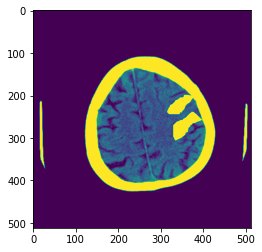

In [10]:
image, label = load_case(DATA_DIR + "ISKEMI/DICOM/10017.dcm", DATA_DIR + "ISKEMI/MASK/10017.png")
window_center = 40
window_width = 80
img_min = window_center - window_width // 2
img_max = window_center + window_width // 2
image[image < img_min] = img_min
image[image > img_max] = img_max

mi, ma = image.min(), image.max()
print(mi,ma)
image = ((image - mi) / (ma - mi)) * 255
#print(image.min(),image.max())
#image = util.get_labeled_image(image[0], label)
label = to_categorical(label, num_classes=3).astype(np.uint8)
#img = PIL.Image.fromarray(image.astype(np.int8), mode="L")
#image = np.asarray(img)
labeled_image = np.zeros_like(label[:, :, 1:])

# remove tumor part from image
labeled_image[:, :, 0] = image * (label[:, :, 0])
labeled_image[:, :, 1] = image * (label[:, :, 0])
print(image.shape,label.shape)
print(labeled_image[:,:,1].max())
print(label.max(),label.min())
labeled_image += label[:, :, 1:] * 255
plt.imshow(labeled_image[:,:,0])
#util.plot_image_grid(image)

In [4]:
print(label.shape)
label = to_categorical(label, num_classes=3).astype(np.uint8)
print(label.shape)

(512, 512)
(512, 512, 3)


In [5]:
print(label[:,:,1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
image, label = load_case(DATA_DIR + "ISKEMI/DICOM/10017.dcm", DATA_DIR + "ISKEMI/MASK/10017.png")
window_center = 40
window_width = 80
img_min = window_center - window_width // 2
img_max = window_center + window_width // 2
image[image < img_min] = img_min
image[image > img_max] = img_max

mi, ma = image.min(), image.max()
print(mi,ma)
image = ((image - mi) / (ma - mi)) * 255

0 80
